In [2]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt


### Loading data


In [3]:
root_dir = os.path.abspath(os.curdir)  # Doesn't work as intended. Needs fix below.
root_dir = root_dir[:-9]
results_dir = root_dir + "/results/"
file_name = "belief_distributions_before_after.csv"
# file_name = "belief_distr_{'NormalUser': 1.0, 'Disinformer': 0.0}.csv"
# file_name = "belief_distr_{'NormalUser': 0.99, 'Disinformer': 0.01}.csv"
# file_name = "belief_distr_{'NormalUser': 0.98, 'Disinformer': 0.02}.csv"
# file_name = "belief_distr_{'NormalUser': 0.95, 'Disinformer': 0.05}.csv"

file_dir = results_dir + file_name

data = pd.read_csv(file_dir)


In [4]:
data.head(5)


,Unnamed: 0,Replication,"((0.0, <SelectAgentsBy.RANDOM: 0>), True)","((0.0, <SelectAgentsBy.RANDOM: 0>), False)","((0.1, <SelectAgentsBy.RANDOM: 0>), True)","((0.1, <SelectAgentsBy.RANDOM: 0>), False)","((0.25, <SelectAgentsBy.RANDOM: 0>), True)","((0.25, <SelectAgentsBy.RANDOM: 0>), False)","((0.9, <SelectAgentsBy.RANDOM: 0>), True)","((0.9, <SelectAgentsBy.RANDOM: 0>), False)"
0,0,0,"([16, 59, 60, 83, 67, 59, 81, 48, 2, 90, 39, 1...","([63, 83, 68, 89, 6, 66, 82, 1, 72, 69, 31, 10...","([14, 71, 61, 86, 100, 60, 17, 1, 0, 21, 46, 9...","([34, 43, 27, 1, 76, 20, 90, 6, 78, 96, 4, 75,...","([72, 81, 76, 76, 79, 5, 12, 49, 20, 90, 60, 5...","([9, 38, 42, 99, 17, 66, 48, 3, 87, 0, 33, 31,...","([84, 16, 74, 14, 68, 79, 96, 97, 6, 6, 9, 1, ...","([72, 74, 14, 98, 83, 28, 58, 20, 38, 66, 2, 0..."
1,1,1,"([50, 48, 65, 70, 51, 35, 78, 8, 33, 79, 43, 9...","([23, 54, 56, 33, 52, 85, 96, 3, 27, 65, 32, 6...","([89, 100, 67, 97, 24, 26, 7, 96, 85, 43, 56, ...","([90, 26, 94, 95, 86, 62, 71, 47, 44, 72, 59, ...","([22, 77, 92, 98, 7, 44, 26, 7, 73, 80, 79, 33...","([85, 69, 8, 5, 14, 82, 41, 91, 84, 83, 48, 10...","([23, 55, 49, 42, 40, 92, 55, 55, 16, 26, 94, ...","([0, 7, 51, 80, 81, 59, 84, 35, 3, 51, 46, 25,..."
2,2,2,"([21, 92, 89, 77, 38, 37, 24, 86, 18, 13, 37, ...","([32, 6, 60, 25, 86, 19, 75, 58, 97, 100, 63, ...","([50, 18, 38, 52, 8, 51, 28, 6, 96, 13, 42, 31...","([41, 76, 6, 53, 32, 38, 43, 46, 51, 38, 98, 6...","([76, 38, 64, 68, 63, 89, 43, 97, 75, 39, 81, ...","([31, 37, 90, 30, 42, 22, 0, 84, 57, 52, 47, 1...","([44, 3, 21, 47, 90, 68, 37, 83, 33, 32, 52, 0...","([67, 3, 55, 36, 57, 23, 81, 28, 54, 4, 87, 51..."


### Reshaping data

In [5]:
data.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
data.drop(["a", "Replication"], axis=1, inplace=True)
data.head(5)

,"((0.0, <SelectAgentsBy.RANDOM: 0>), True)","((0.0, <SelectAgentsBy.RANDOM: 0>), False)","((0.1, <SelectAgentsBy.RANDOM: 0>), True)","((0.1, <SelectAgentsBy.RANDOM: 0>), False)","((0.25, <SelectAgentsBy.RANDOM: 0>), True)","((0.25, <SelectAgentsBy.RANDOM: 0>), False)","((0.9, <SelectAgentsBy.RANDOM: 0>), True)","((0.9, <SelectAgentsBy.RANDOM: 0>), False)"
0,"([16, 59, 60, 83, 67, 59, 81, 48, 2, 90, 39, 1...","([63, 83, 68, 89, 6, 66, 82, 1, 72, 69, 31, 10...","([14, 71, 61, 86, 100, 60, 17, 1, 0, 21, 46, 9...","([34, 43, 27, 1, 76, 20, 90, 6, 78, 96, 4, 75,...","([72, 81, 76, 76, 79, 5, 12, 49, 20, 90, 60, 5...","([9, 38, 42, 99, 17, 66, 48, 3, 87, 0, 33, 31,...","([84, 16, 74, 14, 68, 79, 96, 97, 6, 6, 9, 1, ...","([72, 74, 14, 98, 83, 28, 58, 20, 38, 66, 2, 0..."
1,"([50, 48, 65, 70, 51, 35, 78, 8, 33, 79, 43, 9...","([23, 54, 56, 33, 52, 85, 96, 3, 27, 65, 32, 6...","([89, 100, 67, 97, 24, 26, 7, 96, 85, 43, 56, ...","([90, 26, 94, 95, 86, 62, 71, 47, 44, 72, 59, ...","([22, 77, 92, 98, 7, 44, 26, 7, 73, 80, 79, 33...","([85, 69, 8, 5, 14, 82, 41, 91, 84, 83, 48, 10...","([23, 55, 49, 42, 40, 92, 55, 55, 16, 26, 94, ...","([0, 7, 51, 80, 81, 59, 84, 35, 3, 51, 46, 25,..."
2,"([21, 92, 89, 77, 38, 37, 24, 86, 18, 13, 37, ...","([32, 6, 60, 25, 86, 19, 75, 58, 97, 100, 63, ...","([50, 18, 38, 52, 8, 51, 28, 6, 96, 13, 42, 31...","([41, 76, 6, 53, 32, 38, 43, 46, 51, 38, 98, 6...","([76, 38, 64, 68, 63, 89, 43, 97, 75, 39, 81, ...","([31, 37, 90, 30, 42, 22, 0, 84, 57, 52, 47, 1...","([44, 3, 21, 47, 90, 68, 37, 83, 33, 32, 52, 0...","([67, 3, 55, 36, 57, 23, 81, 28, 54, 4, 87, 51..."


In [6]:
# Rename columns
# column_names = ["0%_True", "0%_False","0%_True", "0%_False","0%_True", "0%_False","0%_True", "0%_False",]
data.rename({"((0.0, <SelectAgentsBy.RANDOM: 0>), True)":"0%,\nR",
             "((0.0, <SelectAgentsBy.RANDOM: 0>), False)":"0%,\n–",
             "((0.1, <SelectAgentsBy.RANDOM: 0>), True)":"10%,\nR",
             "((0.1, <SelectAgentsBy.RANDOM: 0>), False)":"10%,\n–",
             "((0.25, <SelectAgentsBy.RANDOM: 0>), True)":"25%,\nR",
             "((0.25, <SelectAgentsBy.RANDOM: 0>), False)":"25%,\n–",
             "((0.9, <SelectAgentsBy.RANDOM: 0>), True)":"90%,\nR",
             "((0.9, <SelectAgentsBy.RANDOM: 0>), False)":"90%,\n–"}, axis="columns", inplace=True)


# Switch Columns (first w/o ranking, then w/ranking)
data = data[["0%,\n–", "0%,\nR",
             "10%,\n–", "10%,\nR",
             "25%,\n–", "25%,\nR",
             "90%,\n–", "90%,\nR",]]

data.head(5)


,"0%,\n–","0%,\nR","10%,\n–","10%,\nR","25%,\n–","25%,\nR","90%,\n–","90%,\nR"
0,"([63, 83, 68, 89, 6, 66, 82, 1, 72, 69, 31, 10...","([16, 59, 60, 83, 67, 59, 81, 48, 2, 90, 39, 1...","([34, 43, 27, 1, 76, 20, 90, 6, 78, 96, 4, 75,...","([14, 71, 61, 86, 100, 60, 17, 1, 0, 21, 46, 9...","([9, 38, 42, 99, 17, 66, 48, 3, 87, 0, 33, 31,...","([72, 81, 76, 76, 79, 5, 12, 49, 20, 90, 60, 5...","([72, 74, 14, 98, 83, 28, 58, 20, 38, 66, 2, 0...","([84, 16, 74, 14, 68, 79, 96, 97, 6, 6, 9, 1, ..."
1,"([23, 54, 56, 33, 52, 85, 96, 3, 27, 65, 32, 6...","([50, 48, 65, 70, 51, 35, 78, 8, 33, 79, 43, 9...","([90, 26, 94, 95, 86, 62, 71, 47, 44, 72, 59, ...","([89, 100, 67, 97, 24, 26, 7, 96, 85, 43, 56, ...","([85, 69, 8, 5, 14, 82, 41, 91, 84, 83, 48, 10...","([22, 77, 92, 98, 7, 44, 26, 7, 73, 80, 79, 33...","([0, 7, 51, 80, 81, 59, 84, 35, 3, 51, 46, 25,...","([23, 55, 49, 42, 40, 92, 55, 55, 16, 26, 94, ..."
2,"([32, 6, 60, 25, 86, 19, 75, 58, 97, 100, 63, ...","([21, 92, 89, 77, 38, 37, 24, 86, 18, 13, 37, ...","([41, 76, 6, 53, 32, 38, 43, 46, 51, 38, 98, 6...","([50, 18, 38, 52, 8, 51, 28, 6, 96, 13, 42, 31...","([31, 37, 90, 30, 42, 22, 0, 84, 57, 52, 47, 1...","([76, 38, 64, 68, 63, 89, 43, 97, 75, 39, 81, ...","([67, 3, 55, 36, 57, 23, 81, 28, 54, 4, 87, 51...","([44, 3, 21, 47, 90, 68, 37, 83, 33, 32, 52, 0..."


### Histogram


In [7]:
# Overview of the agents' belief distribution at the end
# for policy in data.columns:
policies = data.columns
policy_nr = 1

policy_data = data.iloc[:,policy_nr]  # [0]
# after = data.iloc[:,policy_nr][1]

In [8]:
print(policy_data)


0    ([16, 59, 60, 83, 67, 59, 81, 48, 2, 90, 39, 1...
1    ([50, 48, 65, 70, 51, 35, 78, 8, 33, 79, 43, 9...
2    ([21, 92, 89, 77, 38, 37, 24, 86, 18, 13, 37, ...
Name: 0%,\nR, dtype: object


In [9]:
def convert(string):
    """
    Converts the String of each cell within the dataframe into two lists of agent beliefs
    (before and after the run)
    :return before: list of floats, each in domain [0,100]
    :return after: list of floats, each in domain [0,100]
    """
    # remove tuple parentheses
    string = string[2:-2]

    # split before <> after
    before, after = list(string.split("], ["))

    # convert from string to lists
    before = list(before.split(", "))
    after = list(after.split(", "))

    # convert individual values from String to float
    before = [float(s) for s in before]
    after = [float(s) for s in after]

    return before, after

In [10]:
# Checking whether converting works
for row in policy_data:
    print(f"row: {type(row)}")
    before, after = convert(row)
    print(f'before: {type(before[0])} \n'
          f'after: {type(after[0])} \n')


row: <class 'str'>
before: <class 'float'> 
after: <class 'float'> 

row: <class 'str'>
before: <class 'float'> 
after: <class 'float'> 

row: <class 'str'>
before: <class 'float'> 
after: <class 'float'> 



## Preparing the lists (before & after)

In [11]:
run_id = 0
row = policy_data[run_id]
before, after = convert(row)


# Plotting

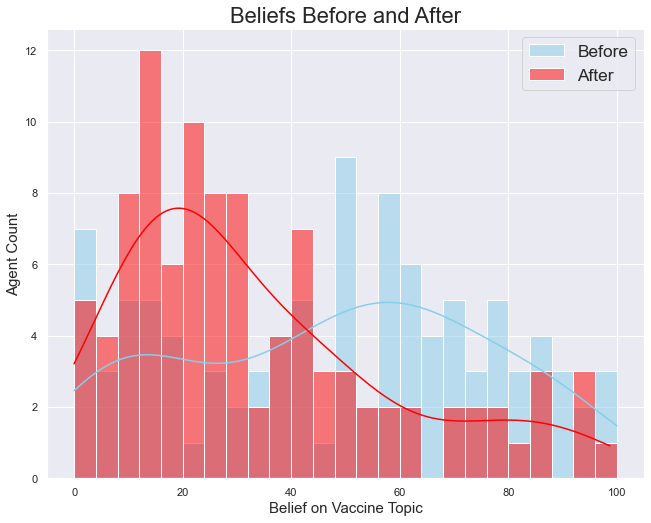

In [17]:
sns.set(style="darkgrid", rc={'figure.figsize':(10.7,8.27)})

sns.histplot(data=before, color="skyblue", label="Before", kde=True, bins=25, binrange=(0,100))
sns.histplot(data=after, color="red", label="After", kde=True, bins=25, binrange=(0,100))

plt.legend(fontsize='x-large')
plt.xlabel("Belief on Vaccine Topic", fontsize=15)
plt.ylabel("Agent Count", fontsize=15)
plt.title("Beliefs Before and After", fontsize=22)
plt.show()